# 1. Install and Import Dependencies

In [ ]:
!pip install torch
!pip install torchvision

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-16 Python-3.9.12 torch-1.8.1+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


# 3. Training

In [4]:
!cd yolov5 && python train.py --img 416 --batch 8 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-186-g3356f26 Python-3.9.12 torch-1.8.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

     11/49        0G   0.05645   0.05285   0.02266       120       416:  61%|######    | 34/56 [02:35<01:38,  4.50s/it]
     11/49        0G   0.05624   0.05264   0.02269        95       416:  61%|######    | 34/56 [02:39<01:38,  4.50s/it]
     11/49        0G   0.05624   0.05264   0.02269        95       416:  62%|######2   | 35/56 [02:39<01:34,  4.48s/it]
     11/49        0G   0.05629   0.05315   0.02258       138       416:  62%|######2   | 35/56 [02:43<01:34,  4.48s/it]
     11/49        0G   0.05629   0.05315   0.02258       138       416:  64%|######4   | 36/56 [02:43<01:28,  4.42s/it]
     11/49        0G   0.05621    0.0529   0.02263        79       416:  64%|######4   | 36/56 [02:48<01:28,  4.42s/it]
     11/49        0G   0.05621    0.0529   0.02263        79       416:  66%|######6   | 37/56 [02:48<01:24,  4.43s/it]
     11/49        0G   0.05606   0.05257   0.02264        61       416:  66%|######6   | 37/56 [02:52<01:24,  4.43s/it]
     11/49        0G   0.05606   0.05257

# 6. Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2022-5-18 Python-3.9.12 torch-1.8.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7029004 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [6]:
model.conf = 0.45  # confidence threshold (0-1)
#model.iou = 0.45  # NMS IoU threshold (0-1)

# 3. Make Detections with Images

In [10]:
for i in os.listdir('data/test/images/'):
    print(i)
    results = model('data/test/images/'+i,size=512)
    results.print()
    results.save(save_dir='Output/')
    

IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 puffin
Speed: 13.2ms pre-process, 370.4ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg


Saved 1 image to Output


image 1/1: 1024x768 14 penguins
Speed: 17.0ms pre-process, 407.0ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg


Saved 1 image to Output


image 1/1: 1024x768 7 penguins
Speed: 16.7ms pre-process, 377.6ms inference, 8.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 penguins
Speed: 26.9ms pre-process, 481.4ms inference, 8.3ms NMS per image at shape (1, 3, 512, 384)
IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 penguins
Speed: 18.9ms pre-process, 431.5ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 fishs, 1 shark
Speed: 23.3ms pre-process, 384.6ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 fish
Speed: 20.0ms pre-process, 443.8ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 fishs
Speed: 19.8ms pre-process, 424.6ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 fish, 1 starfish
Speed: 26.3ms pre-process, 415.0ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg


Saved 1 image to Output


image 1/1: 1024x768 7 fishs
Speed: 28.8ms pre-process, 419.6ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg


Saved 1 image to Output


image 1/1: 1024x768 13 fishs, 2 sharks
Speed: 25.2ms pre-process, 367.1ms inference, 2.4ms NMS per image at shape (1, 3, 512, 384)
IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 fishs
Speed: 27.2ms pre-process, 353.6ms inference, 8.2ms NMS per image at shape (1, 3, 512, 384)
IMG_2446_jpeg_jpg.rf.06ee05e92df8e3c33073147d8f595211.jpg


Saved 1 image to Output


image 1/1: 1024x768 7 fishs, 2 sharks
Speed: 24.7ms pre-process, 469.5ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2448_jpeg_jpg.rf.28ce79dab47ad525751d5407be09bc3d.jpg


Saved 1 image to Output


image 1/1: 1024x768 9 fishs, 4 sharks
Speed: 21.8ms pre-process, 439.5ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2450_jpeg_jpg.rf.ff673921373de3bfc275863e3befeefe.jpg


Saved 1 image to Output


image 1/1: 1024x768 17 fishs, 1 shark
Speed: 28.3ms pre-process, 418.5ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2465_jpeg_jpg.rf.7e699ec1d2e373d93dac32cd02db9438.jpg


Saved 1 image to Output


image 1/1: 1024x768 17 jellyfishs
Speed: 26.0ms pre-process, 426.1ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2466_jpeg_jpg.rf.53886abb9947ec4e47405957b30fe314.jpg


Saved 1 image to Output


image 1/1: 1024x768 6 jellyfishs
Speed: 22.8ms pre-process, 426.9ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2468_jpeg_jpg.rf.c933cc14c99b11a90413a1490d4556db.jpg


Saved 1 image to Output


image 1/1: 1024x768 8 jellyfishs
Speed: 25.5ms pre-process, 377.5ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2470_jpeg_jpg.rf.75b359c8baa6866bfecf07a0e4e8c33d.jpg


Saved 1 image to Output


image 1/1: 1024x768 17 jellyfishs
Speed: 49.6ms pre-process, 382.4ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2473_jpeg_jpg.rf.6284677f9c781b0cfeec54981a17d573.jpg


Saved 1 image to Output


image 1/1: 1024x768 4 jellyfishs
Speed: 22.3ms pre-process, 465.9ms inference, 9.1ms NMS per image at shape (1, 3, 512, 384)
IMG_2477_jpeg_jpg.rf.7b2692f142d53c16ad477065f1f8ae6d.jpg


Saved 1 image to Output


image 1/1: 1024x768 7 jellyfishs
Speed: 21.2ms pre-process, 463.0ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2496_jpeg_jpg.rf.3f91e7f18502074c89fa720a11926fab.jpg


Saved 1 image to Output


image 1/1: 1024x768 5 fishs, 3 sharks, 1 stingray
Speed: 30.6ms pre-process, 429.7ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2499_jpeg_jpg.rf.6cbab3719b9063388b5ab3ab826d7bd3.jpg


Saved 1 image to Output


image 1/1: 1024x768 6 fishs, 2 sharks
Speed: 20.6ms pre-process, 427.1ms inference, 4.5ms NMS per image at shape (1, 3, 512, 384)
IMG_2514_jpeg_jpg.rf.6ccb3859d75fc5cfe053b1c1474254b2.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 sharks
Speed: 23.3ms pre-process, 452.6ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2526_jpeg_jpg.rf.003e1d1d41bcd204df731b85cea68781.jpg


Saved 1 image to Output


image 1/1: 1024x768 5 puffins
Speed: 29.9ms pre-process, 435.9ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2532_jpeg_jpg.rf.2afeb76e5d9372dbbd6fbc53d5b75675.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 starfishs
Speed: 22.0ms pre-process, 386.8ms inference, 0.8ms NMS per image at shape (1, 3, 512, 384)
IMG_2544_jpeg_jpg.rf.03f51bb9e1c57fb9cd62f8cbdca14e90.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 starfishs
Speed: 49.6ms pre-process, 383.6ms inference, 8.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2547_jpeg_jpg.rf.9406b6f1a9fad2292c4abd28f712baaf.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 fish, 2 starfishs
Speed: 24.2ms pre-process, 467.3ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2570_jpeg_jpg.rf.ed40900b657a5b23d92cb2d296ad2dbc.jpg


Saved 1 image to Output


image 1/1: 1024x768 11 fishs, 3 sharks
Speed: 27.3ms pre-process, 431.9ms inference, 0.7ms NMS per image at shape (1, 3, 512, 384)
IMG_2574_jpeg_jpg.rf.ca0c3ad32384309a61e92d9a8bef87b9.jpg


Saved 1 image to Output


image 1/1: 1024x768 12 jellyfishs
Speed: 22.8ms pre-process, 437.4ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2582_jpeg_jpg.rf.14f175066ce74b470bf31fa0c7a096cd.jpg


Saved 1 image to Output


image 1/1: 1024x768 6 fishs, 2 sharks, 2 stingrays
Speed: 24.4ms pre-process, 457.3ms inference, 2.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2588_jpeg_jpg.rf.cb9cea8f05891cfd55a3e93f2908201f.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 stingrays
Speed: 23.9ms pre-process, 412.0ms inference, 1.6ms NMS per image at shape (1, 3, 512, 384)
IMG_2630_jpeg_jpg.rf.310f0c986a72be46b80ce31c2d00e46d.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 fishs, 1 puffin, 2 stingrays
Speed: 33.5ms pre-process, 419.7ms inference, 2.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2632_jpeg_jpg.rf.f44037edca490b16cbf06427e28ea946.jpg


Saved 1 image to Output


image 1/1: 1024x768 5 fishs, 2 stingrays
Speed: 30.3ms pre-process, 354.8ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_2651_jpeg_jpg.rf.84b3930aa80b610cc97bf1c176763940.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 stingray
Speed: 30.5ms pre-process, 410.6ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3129_jpeg_jpg.rf.90c472dcdf9b6713ec767cc97560ceca.jpg


Saved 1 image to Output


image 1/1: 1024x768 1 starfish
Speed: 52.5ms pre-process, 374.3ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3134_jpeg_jpg.rf.50750ca778773042a3c46a1d3e480132.jpg


Saved 1 image to Output


image 1/1: 1024x768 (no detections)
Speed: 26.5ms pre-process, 507.4ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3136_jpeg_jpg.rf.0d8fef73d4cc5e1c35ce424444d9e44b.jpg


Saved 1 image to Output


image 1/1: 1024x768 10 puffins
Speed: 17.6ms pre-process, 467.2ms inference, 1.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3144_jpeg_jpg.rf.f29a36360174dc83ecef93275ed8f02e.jpg


Saved 1 image to Output


image 1/1: 1024x768 3 puffins
Speed: 27.5ms pre-process, 470.7ms inference, 2.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3154_jpeg_jpg.rf.5f429a366c02d38bc9e2217f4508c3e0.jpg


Saved 1 image to Output


image 1/1: 1024x768 2 fishs, 1 puffin
Speed: 29.4ms pre-process, 452.3ms inference, 0.0ms NMS per image at shape (1, 3, 512, 384)
IMG_3164_jpeg_jpg.rf.06637eee0b72df791aa729807ca45c4d.jpg


Saved 1 image to Output


image 1/1: 1024x768 13 penguins
Speed: 27.8ms pre-process, 456.2ms inference, 1.1ms NMS per image at shape (1, 3, 512, 384)
IMG_3173_jpeg_jpg.rf.6f05acaa0b22d410a5df3ea3286e227d.jpg


Saved 1 image to Output


image 1/1: 768x1024 11 penguins
Speed: 17.9ms pre-process, 462.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 512)
IMG_3175_jpeg_jpg.rf.686c7d36e049eea974a363e99bf0bee0.jpg


Saved 1 image to Output


image 1/1: 768x1024 11 penguins
Speed: 23.3ms pre-process, 449.8ms inference, 8.2ms NMS per image at shape (1, 3, 384, 512)
IMG_8331_jpg.rf.ec024bdf1e9de02b020b5e6505c1c58b.jpg


Saved 1 image to Output


image 1/1: 768x1024 2 fishs
Speed: 25.9ms pre-process, 433.9ms inference, 0.0ms NMS per image at shape (1, 3, 384, 512)
IMG_8343_jpg.rf.2d88000497d74d72aedc118b125a0c07.jpg


Saved 1 image to Output


image 1/1: 768x1024 2 fishs, 1 stingray
Speed: 20.1ms pre-process, 453.2ms inference, 1.5ms NMS per image at shape (1, 3, 384, 512)
IMG_8395_jpg.rf.3bebece033961c9f665571644a14261f.jpg


Saved 1 image to Output


image 1/1: 768x1024 7 fishs, 4 sharks
Speed: 26.3ms pre-process, 465.6ms inference, 2.5ms NMS per image at shape (1, 3, 384, 512)
IMG_8396_jpg.rf.106a6ced5c649ea81f0de8ecaa4ff3b8.jpg


Saved 1 image to Output


image 1/1: 768x1024 6 fishs, 4 sharks
Speed: 25.6ms pre-process, 473.1ms inference, 1.0ms NMS per image at shape (1, 3, 384, 512)
IMG_8404_jpg.rf.265b89e862a375f6b89f781ea60ed480.jpg


Saved 1 image to Output


image 1/1: 768x1024 11 fishs, 1 shark, 1 stingray
Speed: 17.5ms pre-process, 452.3ms inference, 8.0ms NMS per image at shape (1, 3, 384, 512)
IMG_8420_jpg.rf.31f1d5f1440e48ccf1dee988b565911b.jpg


Saved 1 image to Output


image 1/1: 768x1024 16 fishs, 1 shark
Speed: 29.6ms pre-process, 461.9ms inference, 9.1ms NMS per image at shape (1, 3, 384, 512)
IMG_8452_jpg.rf.6bbff701ab93e29553b3a70137fd4e66.jpg


Saved 1 image to Output


image 1/1: 768x1024 28 fishs
Speed: 27.7ms pre-process, 435.8ms inference, 0.0ms NMS per image at shape (1, 3, 384, 512)
IMG_8490_jpg.rf.1836542cf054c6d303a2dd05d4194d7f.jpg


Saved 1 image to Output


image 1/1: 768x1024 41 jellyfishs
Speed: 30.3ms pre-process, 413.7ms inference, 2.7ms NMS per image at shape (1, 3, 384, 512)
IMG_8497_MOV-0_jpg.rf.5c59bd1bf7d8fd7a20999d51a79a12c0.jpg


Saved 1 image to Output


image 1/1: 1024x576 7 fishs
Speed: 23.6ms pre-process, 297.7ms inference, 1.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8497_MOV-3_jpg.rf.fd813e14681c8b41e709a500748ce46a.jpg


Saved 1 image to Output


image 1/1: 1024x576 5 fishs
Speed: 22.4ms pre-process, 409.2ms inference, 0.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8497_MOV-5_jpg.rf.3deffb208d656b7845661c5e33dd1afb.jpg


Saved 1 image to Output


image 1/1: 1024x576 7 fishs
Speed: 17.4ms pre-process, 365.1ms inference, 2.6ms NMS per image at shape (1, 3, 512, 288)
IMG_8513_MOV-0_jpg.rf.2a2f77e3f73630b60aaf6ad3ca4ed130.jpg


Saved 1 image to Output


image 1/1: 1024x576 8 fishs
Speed: 31.3ms pre-process, 355.3ms inference, 4.5ms NMS per image at shape (1, 3, 512, 288)
IMG_8515_jpg.rf.98a9daca7c5a5bad9872bd7fb2d4f198.jpg


Saved 1 image to Output


image 1/1: 768x1024 5 fishs
Speed: 29.3ms pre-process, 399.0ms inference, 10.7ms NMS per image at shape (1, 3, 384, 512)
IMG_8582_MOV-0_jpg.rf.aa8304d7a5112d63c8841d96160d42cd.jpg


Saved 1 image to Output


image 1/1: 1024x576 7 fishs, 1 penguin, 1 stingray
Speed: 23.9ms pre-process, 326.9ms inference, 1.7ms NMS per image at shape (1, 3, 512, 288)
IMG_8582_MOV-3_jpg.rf.c7dde0639837077f76428d70223368a4.jpg


Saved 1 image to Output


image 1/1: 1024x576 (no detections)
Speed: 22.9ms pre-process, 408.1ms inference, 0.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8582_MOV-5_jpg.rf.9d7a26fbf145ce39ab0831b4e6bc1f1e.jpg


Saved 1 image to Output


image 1/1: 1024x576 4 fishs, 1 stingray
Speed: 18.5ms pre-process, 368.8ms inference, 1.8ms NMS per image at shape (1, 3, 512, 288)
IMG_8590_MOV-2_jpg.rf.2136fdb5dcbcd58a1dc456bb3e5bf476.jpg


Saved 1 image to Output


image 1/1: 1024x576 3 jellyfishs
Speed: 20.5ms pre-process, 304.7ms inference, 0.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8590_MOV-5_jpg.rf.074e6d8acdd3fcad16d866c341b43769.jpg


Saved 1 image to Output


image 1/1: 1024x576 1 stingray
Speed: 34.1ms pre-process, 391.4ms inference, 0.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8595_MOV-0_jpg.rf.312ab0b8b9fca18134aee88044f45a06.jpg


Saved 1 image to Output


image 1/1: 1024x576 48 jellyfishs
Speed: 21.3ms pre-process, 384.8ms inference, 2.0ms NMS per image at shape (1, 3, 512, 288)
IMG_8599_MOV-3_jpg.rf.412ebb16ea80e964b4464c50e757df0e.jpg


Saved 1 image to Output


image 1/1: 1024x576 4 jellyfishs
Speed: 19.9ms pre-process, 269.7ms inference, 31.9ms NMS per image at shape (1, 3, 512, 288)


In [4]:
img = 'data/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg'
results = model(img)

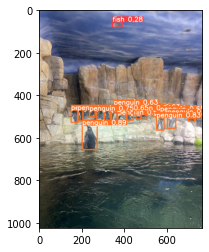

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()